In [1]:
# Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
# Importing the dataset

In [4]:
movies = pd.read_csv("D:\Data science\Assignments docs\Association rules\my_movies.csv")
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [5]:
movies.shape

(10, 15)

In [6]:
movies.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'Sixth Sense', 'Gladiator', 'LOTR1',
       'Harry Potter1', 'Patriot', 'LOTR2', 'Harry Potter2', 'LOTR',
       'Braveheart', 'Green Mile'],
      dtype='object')

In [7]:
# Removing the first 5 columns as they have been converted to dummy variables

In [8]:
movies = movies.iloc[:, 5:]
movies.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [9]:
movies.shape

(10, 10)

In [10]:
movies.isna().sum()                    # Checking for any NA values

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [11]:
# No NA values in the dataset

In [12]:
# Value counts for each movie

In [13]:
counts = movies.apply(pd.Series.value_counts)
counts

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,4,3,8,8,4,8,9,9,9,8
1,6,7,2,2,6,2,1,1,1,2


In [14]:
# Bar plot of counts for each movie

Text(0.5, 0, 'Items')

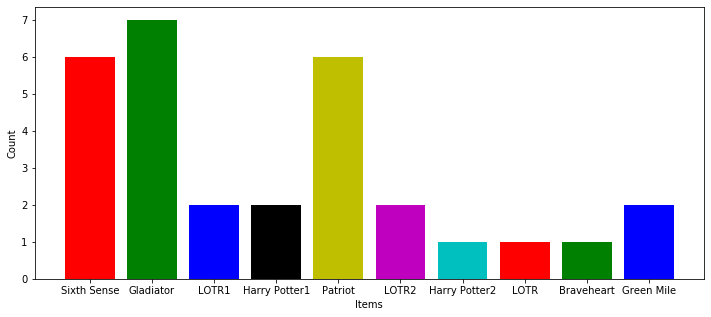

In [15]:
ax = plt.subplots(figsize=(12,5))
plt.bar(
    x=movies.columns,
    height=counts.iloc[1,],
    width = 0.8,
    color='rgbkymc');
plt.ylabel("Count");plt.xlabel("Items")

In [16]:
# Frequency of items for "Gladiator" movie is the highest with 7 counts and lowest for 3 other films just 1 count each

# Apriori algorithm

In [17]:
# Using the apriori alogorithm and filtering the movies with minimun support of 1%

In [18]:
frequent_itemsets = apriori(movies, min_support=0.01, max_len=3, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


In [19]:
frequent_itemsets.shape

(46, 2)

In [20]:
# Sorting the frequent items in descending order

In [21]:
frequent_itemsets.sort_values('support', ascending=False, inplace=True)
frequent_itemsets.sort_values

<bound method DataFrame.sort_values of     support                                  itemsets
1       0.7                               (Gladiator)
0       0.6                             (Sixth Sense)
17      0.6                      (Gladiator, Patriot)
4       0.6                                 (Patriot)
10      0.5                  (Gladiator, Sixth Sense)
13      0.4                    (Patriot, Sixth Sense)
30      0.4         (Patriot, Gladiator, Sixth Sense)
3       0.2                           (Harry Potter1)
9       0.2                              (Green Mile)
5       0.2                                   (LOTR2)
2       0.2                                   (LOTR1)
22      0.2                            (LOTR1, LOTR2)
16      0.2                 (Green Mile, Sixth Sense)
36      0.1       (Harry Potter1, Sixth Sense, LOTR2)
31      0.1            (LOTR, Gladiator, Sixth Sense)
32      0.1      (Green Mile, Gladiator, Sixth Sense)
33      0.1       (LOTR1, Sixth Sense, Harr

In [22]:
# Since there are many itemsets with 1% support, let's change the minimum support to 10%

In [23]:
frequent_itemsets2 = apriori(movies, min_support=0.1, max_len=3, use_colnames=True)
frequent_itemsets2.head()

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


In [24]:
frequent_itemsets2.shape

(46, 2)

In [25]:
frequent_itemsets2.sort_values('support', ascending=False, inplace=True)
frequent_itemsets2.sort_values

<bound method DataFrame.sort_values of     support                                  itemsets
1       0.7                               (Gladiator)
0       0.6                             (Sixth Sense)
17      0.6                      (Gladiator, Patriot)
4       0.6                                 (Patriot)
10      0.5                  (Gladiator, Sixth Sense)
13      0.4                    (Patriot, Sixth Sense)
30      0.4         (Patriot, Gladiator, Sixth Sense)
3       0.2                           (Harry Potter1)
9       0.2                              (Green Mile)
5       0.2                                   (LOTR2)
2       0.2                                   (LOTR1)
22      0.2                            (LOTR1, LOTR2)
16      0.2                 (Green Mile, Sixth Sense)
36      0.1       (Harry Potter1, Sixth Sense, LOTR2)
31      0.1            (LOTR, Gladiator, Sixth Sense)
32      0.1      (Green Mile, Gladiator, Sixth Sense)
33      0.1       (LOTR1, Sixth Sense, Harr

In [26]:
# Since there are many itemsets with 10% support, let's change the minimum support to 20%

In [27]:
frequent_itemsets3 = apriori(movies, min_support=0.2, max_len=3, use_colnames=True)
frequent_itemsets3.head()

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


In [28]:
frequent_itemsets3.shape

(13, 2)

In [29]:
# Sorting the frequent items in descending order

In [30]:
frequent_itemsets3.sort_values('support', ascending=False, inplace=True)
frequent_itemsets3.sort_values

<bound method DataFrame.sort_values of     support                           itemsets
1       0.7                        (Gladiator)
0       0.6                      (Sixth Sense)
4       0.6                          (Patriot)
10      0.6               (Gladiator, Patriot)
7       0.5           (Gladiator, Sixth Sense)
8       0.4             (Patriot, Sixth Sense)
12      0.4  (Patriot, Gladiator, Sixth Sense)
2       0.2                            (LOTR1)
3       0.2                    (Harry Potter1)
5       0.2                            (LOTR2)
6       0.2                       (Green Mile)
9       0.2          (Green Mile, Sixth Sense)
11      0.2                     (LOTR1, LOTR2)>

In [31]:
# we have got total 13 frequent itemsets with 20% support

# Association rules

In [32]:
# Applying association rule with minimum threshold value of lift as 1

In [33]:
rules = association_rules(frequent_itemsets3, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
3,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
5,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
6,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
7,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
8,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
9,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5


In [34]:
rules.shape

(16, 9)

In [35]:
# Filtering the rules again with minimum confidence of 50% and minimun lift of 1

In [36]:
rules = rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5) ]

In [37]:
rules.shape

(15, 9)

In [38]:
# Sorting the rules by lift in descending order

In [39]:
rules = rules.sort_values('lift', ascending=False).head(10)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
15,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
12,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
10,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
8,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
9,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
3,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8


In [40]:
# Finally have got total of 15 rules with minimum support of 10% , minimum confidence of 50% and minimum lift of 1

In [41]:
# Showing top 5 rules

In [42]:
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
15,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
12,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf


In [43]:
# Observations
# Rule 1 shows that people who have seen "LOTR2" movie will also watch "LOTR1" movie with 100% confidence and lift of 5.
# Since both the movies belong to same category. Viewer will be obviously interested in the second movie of same category 

# Visualizations

In [44]:
# importing necessary libraries

In [45]:
import random
import matplotlib.pyplot as plt

In [46]:
# Defining the support and confidence from finalized rules to plot them

In [47]:
support=rules.as_matrix(columns=['support'])
confidence=rules.as_matrix(columns=['confidence'])

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [48]:
# plot of support v/s confidence

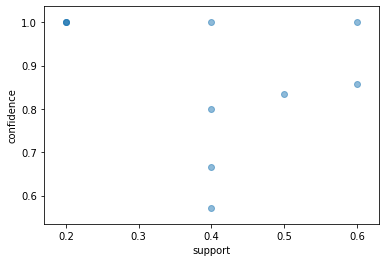

In [49]:
plt.scatter(support, confidence,   alpha=0.5, marker="o")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [50]:
# All the rules have support in the range of 0.4 to 0.6 except for two rules which has the highest confidence of 100% and support of 20%

In [51]:
# plot of support v/s lift

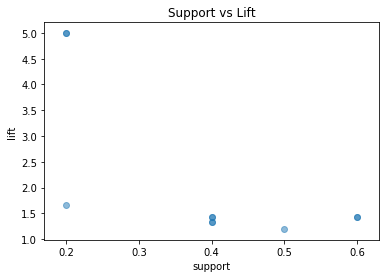

In [52]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

In [53]:
# All the rules have lift in the range of 1 to 1.5 except two rules which have lift of 5 with support of 20%.

In [54]:
# plot of confidence v/s lift

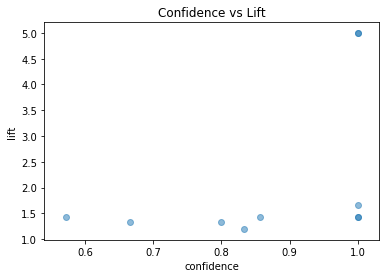

In [55]:
plt.scatter(rules['confidence'], rules['lift'], alpha=0.5)
plt.xlabel('confidence')
plt.ylabel('lift')
plt.title('Confidence vs Lift')
plt.show()

In [56]:
# All the rules have confidence in the range of 0.5 to 0.9 except for two rules which has the highest confidence of 100% and lift of 5